## Programming for Data Analysis Project II
### Author: Sean Elliott

****

In [67]:
import pandas as pd

import numpy as np

import seaborn as sns 

import sklearn.neighbors as nei

import matplotlib.pyplot as plt 

import sklearn.model_selection as mod

import seaborn as sns

from math import sqrt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold

from sklearn.model_selection import LeaveOneOut

from sklearn.model_selection import LeavePOut

from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix, classification_report

from sklearn import neighbors, linear_model

from sklearn.preprocessing import scale

from sklearn.neighbors import KNeighborsClassifier


## Wisconsin Breat Cancer Dataset 
![](https://archive.ics.uci.edu/ml/assets/MLimages/Large14.jpg)

This project is an indepth look att he 'Wisconsin Breats Cancer dataset which was produced on 15/07/1995. It is a multivariate dataset with 699 instances of data. There are 10 'Attributes' in the dataset which will be explored in the project below. The project must consist of the following requirements. We are required to;

• Undertake an analysis/review of the dataset and present an overview and background.

• Provide a literature review on classifiers which have been applied to the dataset and compare their performance.

• Present a statistical analysis of the dataset.

• Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers.

• Compare, contrast and critique your results with reference to the literature.

• Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints.

### Source of Dataset

Creators:

1. Dr. William H. Wolberg, General Surgery Dept.
University of Wisconsin, Clinical Sciences Center
Madison, WI 53792
wolberg '@' eagle.surgery.wisc.edu

2. W. Nick Street, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
street '@' cs.wisc.edu 608-262-6619

3. Olvi L. Mangasarian, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi '@' cs.wisc.edu

Donor:

Nick Street


### Dataset Information

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

According to the article on ['Multisurface method of pattern separation for medical diagnosis applied to breast cytology'](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC55130/?page=1) written by Dr William H Wolberg and Olvi L. Mangasarian "... each element of the pattern sets is comprised of various scalar observations...Each of 11 cytological characteristics of breast fine-needle aspirates reported to differ between benign and malignant samples was graded 1 to 10 at the time of sample collection. Nine characteristics were found to differ significantly between benign and malignant samples. Mathematically, these values for each sample were represented by a point in a nine-dimensional space of real variables. Benign points were separated from malignant ones by planes determined by linear programming."

## Literature Review:

The literature I have chosen to review regarding the original Wisconsin breast cancer dataset can be found [here](https://www.researchgate.net/publication/311950799_Analysis_of_the_Wisconsin_Breast_Cancer_Dataset_and_Machine_Learning_for_Breast_Cancer_Detection). The analysis is called 'Analysis of the Wisconsin Breast Cancer Dataset and Machine Learning for Breast Cancer Detection' and it was published by Lucas Borges.

"To create the dataset Dr. Wolberg used fluid samples, taken from patients with solid breast masses[10] and an easy-to use graphical computer program called Xcyt[11], which is capable of perform the analysis of cytological features based on a digital scan."

Each feature in the dataset is evaluated on a scale od 1 to 10, with 1 being the closes to bening and 10 being the closest to malignant. Statistical analysis showed that the 9 characteristics varied greatly between malignant and benign samples.




## What is breast cancer?

[Breast cancer](#https://www.uicc.org/what-we-do/thematic-areas-work/breast-cancer?gclid=EAIaIQobChMIutzCy4Hv-wIVybHtCh0XWQfTEAAYAiAAEgK8F_D_BwE) is the most diagnsoed cancer in the world. It accounts for 1 in 4 cancer cases amoungst women and is the leading cause of death from cancer for women. There are an estimated 2.2 million new cases of cancer diagnosed in 2020, 1 in 10 of those diagnoses is breast cancer.  

![](https://www.uicc.org/sites/main/files/thumbnails/image/Breast-cancer-graph-top-cancer-per-country-new-cases-2020-female-web.png_0.png)

The dataset below contains many classifications which help doctors to correctly diagnose whether a sample is benign or malignant, and secondly what the best course of action will be for treatment. I will give a glossary of the attributes below and their meanings - ultimately this will help with my understanding of the dataset and hopefully during the Machine Learning stage it will help clarify a few things. Something to note is that each attribute is classified on a scale of 1 - 10, with 1 being the closest to benign, and 10 being the closest to malignant; barring the final attribute called 'Class' which is either '2' or '4'. The terms in the dataset are as below:
 
1) Sample Number - The Sample ID number 
 
2) Clump Thickness - Benign cells tend to be grouped in monolayers, while cancerous cells are often grouped in multilayers.
 
3) Cell Size - Cancer cells tend to vary in size and shape
 
4) Cell Shape -  Cancer cells tend to vary in shape and size
 
5) Adhesion - Normal cells tend to stick together while cancer cells tend to lose this ability, so the loss of adhesion is a sign of malignancy.

6) Single Epithelial Cell Size - If significantly enlarged may be a malignant cell.
 
7) Bare Nuclei - This is a term used for nuclei not surrounded by cytoplasm (the rest of the cell). Those are typically seen in benign tumors.
 
8) Bland Chromatin - Describes a uniform "texture" of the nucleus seen in benign cells. In cancer cells, the chromatin tends to be more coarse and to form clumps.
 
9) Normal Nucleoli - Nucleoli are small structures seen in the nucleus. In normal cells, the nucleolus is usually very small if visible at all. The nucleoli become more prominent in cancer cells, and sometimes there are multiple.
 
10) [Mitoses](https://www.cancer.gov/publications/dictionaries/cancer-terms/def/mitotic-rate) - 'A measure of how fast cancer cells are dividing and growing.'
 
11) Class - description of data, '2' is an indicator for Benign and '4' is Malignant.

****
 
Descriptions above were taken from this [website](https://www.neuraldesigner.com/learning/examples/breast-cancer-diagnosis#:~:text=Epithelial%20cells%20that%20are%20significantly,typically%20seen%20in%20benign%20tumors.).

In [68]:
#start by loading dataset and adding headers to columns for clarity
df = pd.read_csv('https://raw.githubusercontent.com/SeanE15/Programming_for_data_analysis_II/main/Dataset/breast-cancer-wisconsin.data')
df.columns = ["Sample_Number", "Clump_Thickness", "Cell_Size", "Cell_Shape","Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]

In [69]:
# remove any variable which might muddy the dataset's values
df = df.dropna()

In [70]:
# check that no more NaN values are in the data set.
print(df.isnull().sum())

Sample_Number                  0
Clump_Thickness                0
Cell_Size                      0
Cell_Shape                     0
Adhesion                       0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


# Introduction to the data

Now that we have cleaned the dataset above, we will now start to disect the informaiton, catergorise it, and deduce which data is most pertinent to the investigation we are trying to carry out.

In [71]:
df['Class'].value_counts()

2    457
4    241
Name: Class, dtype: int64

C:\Users\Sean\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

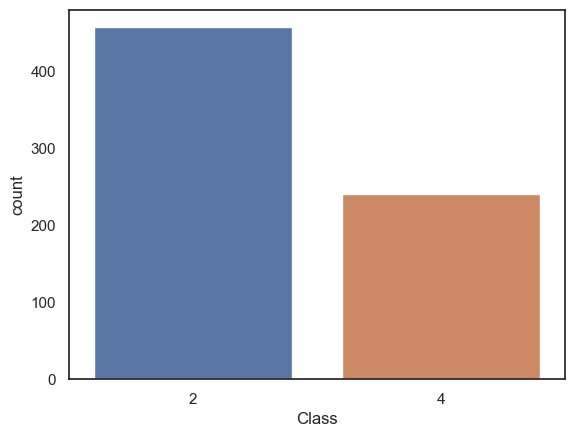

In [72]:
# We start by asking the question, from the dataset, which samples are bening and which are malignant. 
# If the data set presents a '2'the sample is benign, if a '4' is presented then the samples are malignant.

sns.countplot(df.Class,label='Number of Cases')
plt.show

 From the investigation above we can see that 457 of the samples tested were benign, while 241 cases were malignant.

![](https://miro.medium.com/max/720/1*pxFCmhRFTighUn88baLcSA.webp)

In [73]:
# Drop sample number column as the data is not relevant
df.drop('Sample_Number', axis=1, inplace=True)

In [74]:
df.head().T

,0,1,2,3,4
Clump_Thickness,5,3,6,4,8
Cell_Size,4,1,8,1,10
Cell_Shape,4,1,8,1,10
Adhesion,5,1,1,3,8
Single_Epithelial_Cell_Size,7,2,3,2,7
Bare_Nuclei,10,2,4,1,10
Bland_Chromatin,3,3,3,3,9
Normal_Nucleoli,2,1,7,1,7
Mitoses,1,1,1,1,1
Class,2,2,2,2,4


In [75]:
df.corr()

,Clump_Thickness,Cell_Size,Cell_Shape,Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_Thickness,1.000000,0.645366,0.655089,0.486699,0.522108,0.590890,0.558511,0.536176,0.350176,0.716509
Cell_Size,0.645366,1.000000,0.906814,0.705397,0.751674,0.686130,0.755824,0.722699,0.458548,0.817772
Cell_Shape,0.655089,0.906814,1.000000,0.682871,0.719524,0.706314,0.736066,0.719272,0.438756,0.818794
Adhesion,0.486699,0.705397,0.682871,1.000000,0.599402,0.666273,0.666759,0.603132,0.417476,0.696605
Single_Epithelial_Cell_Size,0.522108,0.751674,0.719524,0.599402,1.000000,0.582578,0.616108,0.628704,0.478975,0.682618
Bare_Nuclei,0.590890,0.686130,0.706314,0.666273,0.582578,1.000000,0.673877,0.573819,0.342351,0.818962
Bland_Chromatin,0.558511,0.755824,0.736066,0.666759,0.616108,0.673877,1.000000,0.665914,0.344118,0.756732
Normal_Nucleoli,0.536176,0.722699,0.719272,0.603132,0.628704,0.573819,0.665914,1.000000,0.428185,0.712067
Mitoses,0.350176,0.458548,0.438756,0.417476,0.478975,0.342351,0.344118,0.428185,1.000000,0.423008
Class,0.716509,0.817772,0.818794,0.696605,0.682618,0.818962,0.756732,0.712067,0.423008,1.000000


As we can see from the correlation table above, there is strong correlation between:

Cell Shape, Cell Size and Bland Chromatin levels with a malignant tumor. There is also strong correlation between Bare Nuclei and Cell Shape.

# Analysing Data

<AxesSubplot:>

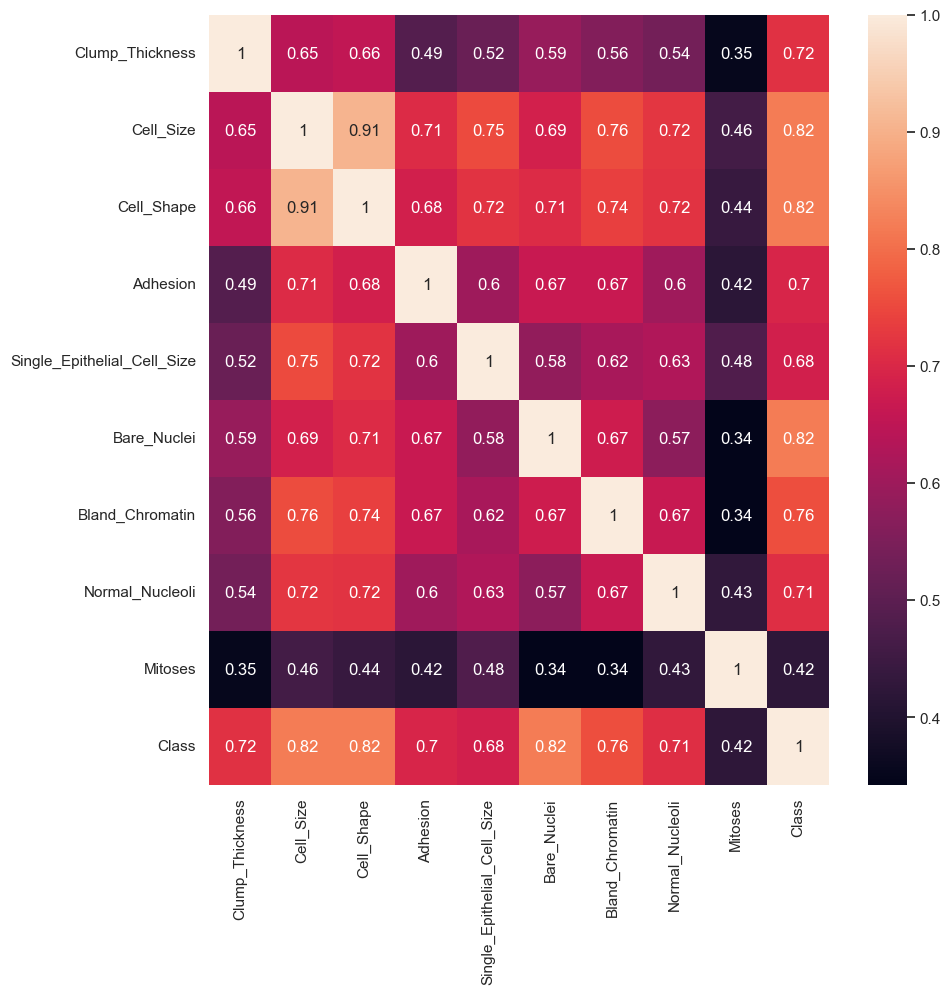

In [76]:
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

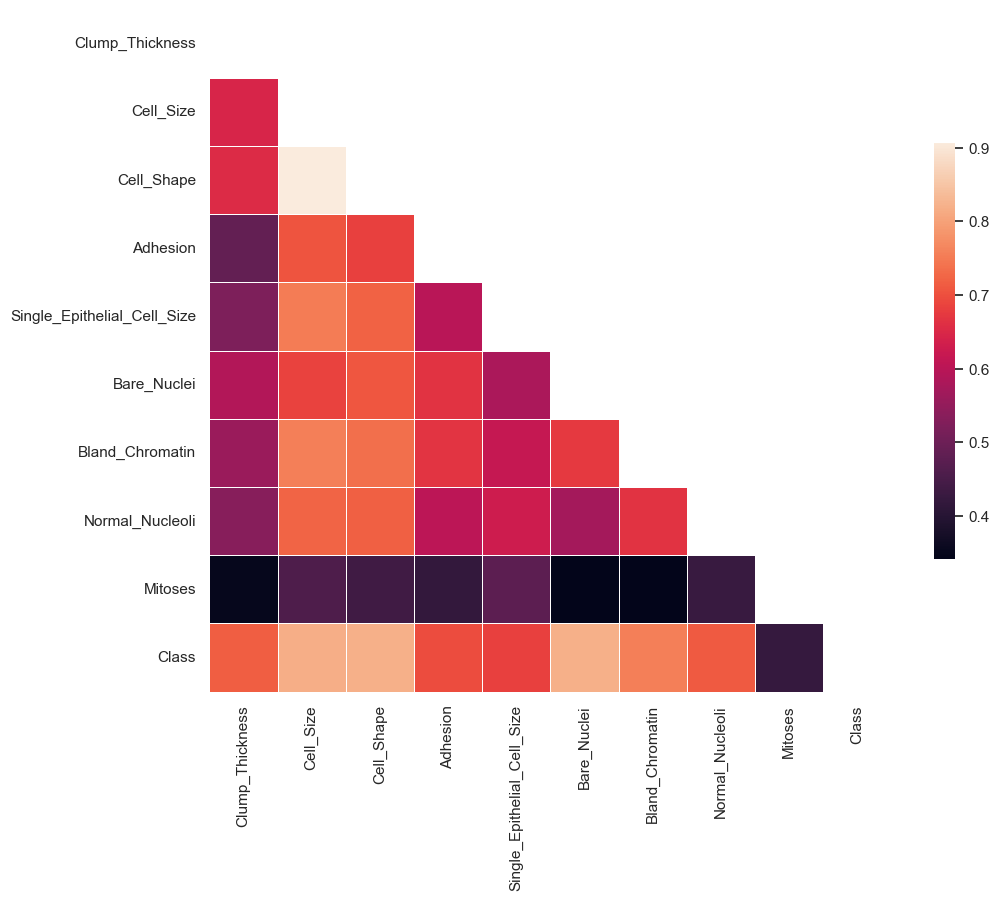

In [77]:
#Plot below is just a copy of the above heatmap but in a more presentable and more discernable way of looking at the data correlations.

sns.set_theme(style="white")
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormapcmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask,square=True, linewidths=.5, cbar_kws={"shrink": .6})

### Analysis of Heat Map 

In a correlation heat map, the way it is interpreted is the higher the correlation value, the more correlated the two variables are:

1) Cell Shape, Cell Size and Clump Thickness are almost directly correlated with either a Benign or Malignant diagnosis.

2) Mitoses is strongly linked with Cell Size and Single Epithelial Cell Size.

3) Bland Chromatin is strong correlated with Class (Benign or Malignant), Cell Shape and Cell Size.

4) Mitoses has its strongest correlation with Single Epithelial Cell Size.

6) Bare Nuclei are also a strong indicator for accurate diagnosis of samples.

<Figure size 1000x1000 with 0 Axes>

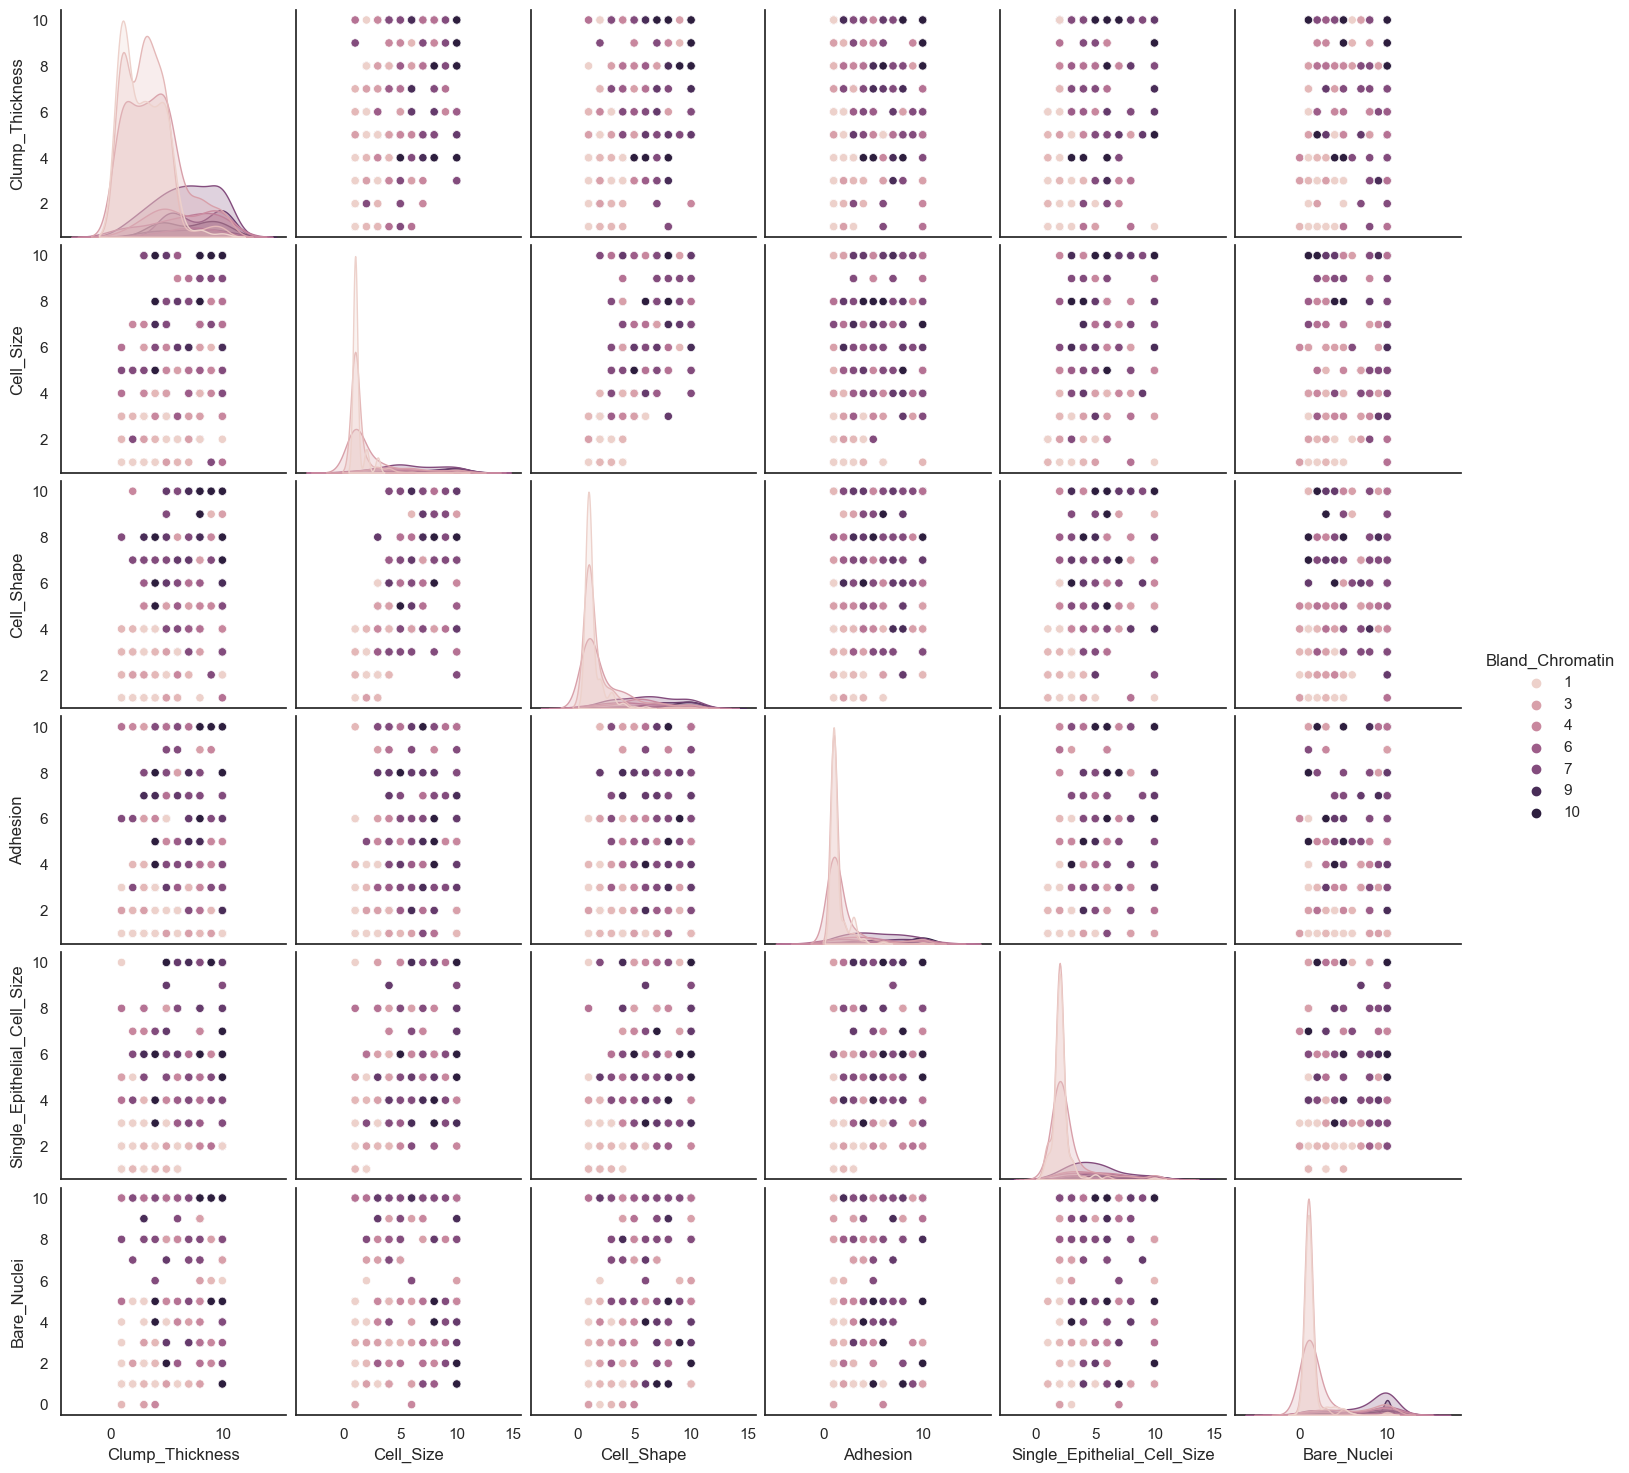

In [78]:
plt.figure(figsize =(10,10))
columns= [df.columns]
sns.pairplot(df.iloc[:, 0:7], hue='Bland_Chromatin')

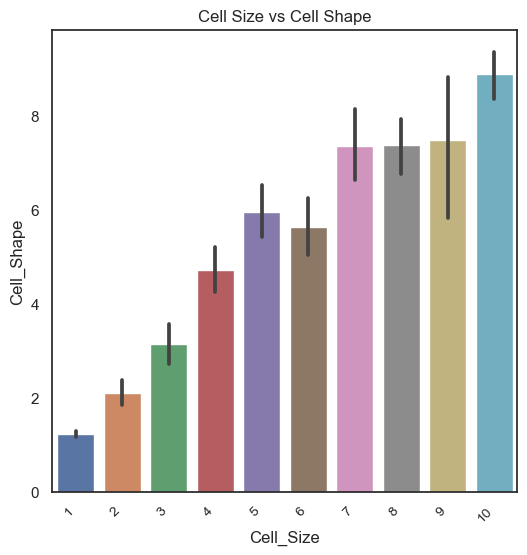

In [79]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x ='Cell_Size', y = 'Cell_Shape', data = df)
plt.xticks(rotation = 45, horizontalalignment='right',fontweight='light', fontsize='small')
plt.title('Cell Size vs Cell Shape');

<Figure size 600x600 with 0 Axes>

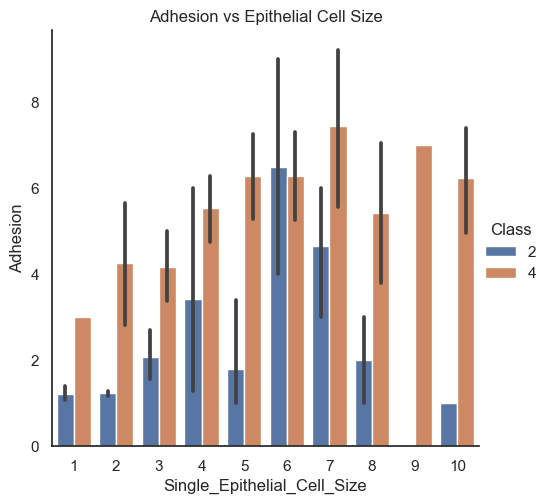

In [80]:
fig = plt.figure(figsize = (6,6))
sns.catplot(x='Single_Epithelial_Cell_Size', y='Adhesion', hue='Class', data=df, kind='bar')
plt.title('Adhesion vs Epithelial Cell Size');

<Figure size 600x600 with 0 Axes>

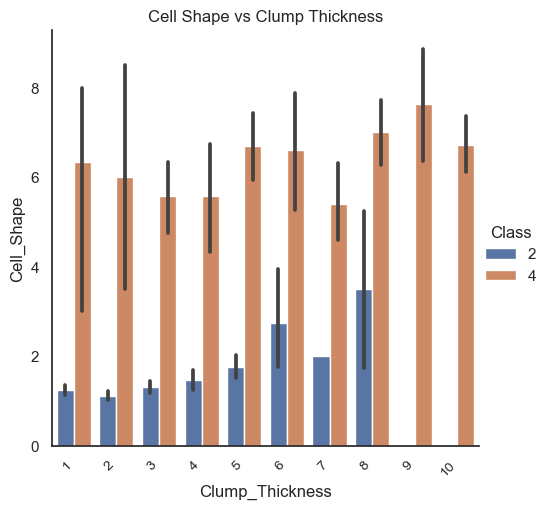

In [81]:
fig = plt.figure(figsize = (6,6))
sns.catplot(x='Clump_Thickness', y='Cell_Shape', hue='Class', data=df, kind='bar')
plt.xticks(rotation = 45, horizontalalignment='right',fontweight='light', fontsize='small')
plt.title('Cell Shape vs Clump Thickness');

<Figure size 600x600 with 0 Axes>

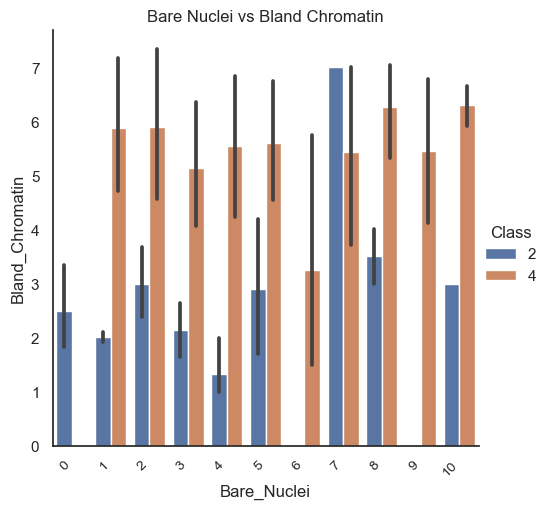

In [82]:
fig = plt.figure(figsize = (6,6))
sns.catplot(x='Bare_Nuclei', y='Bland_Chromatin', hue='Class', data=df, kind='bar')
plt.xticks(rotation = 45, horizontalalignment='right',fontweight='light', fontsize='small')
plt.title('Bare Nuclei vs Bland Chromatin');

<Figure size 600x600 with 0 Axes>

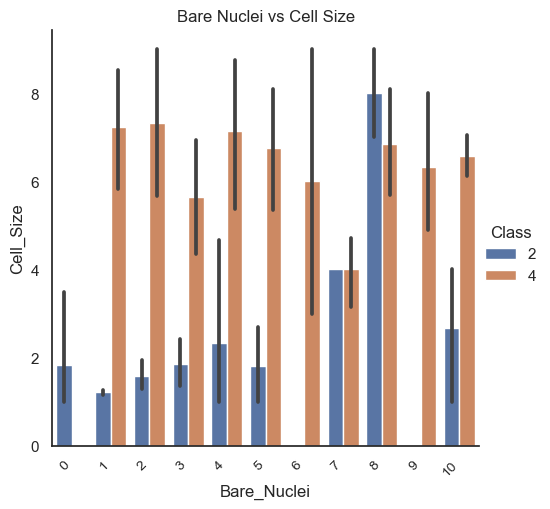

In [83]:
fig = plt.figure(figsize = (6,6))
sns.catplot(x='Bare_Nuclei', y='Cell_Size', hue='Class', data=df, kind='bar')
plt.xticks(rotation = 45, horizontalalignment='right',fontweight='light', fontsize='small')
plt.title('Bare Nuclei vs Cell Size');

As we can see from the pairplot above; there is a direct correlation between Cell Size and Cell Shape. This correlation is in direct agreement with the breast check advice which is to look out for lumps or a change in shape/size of breasts or any pre-existing lumps. 

C:\Users\Sean\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Difference between Bare Nuclei and Diagnosis')

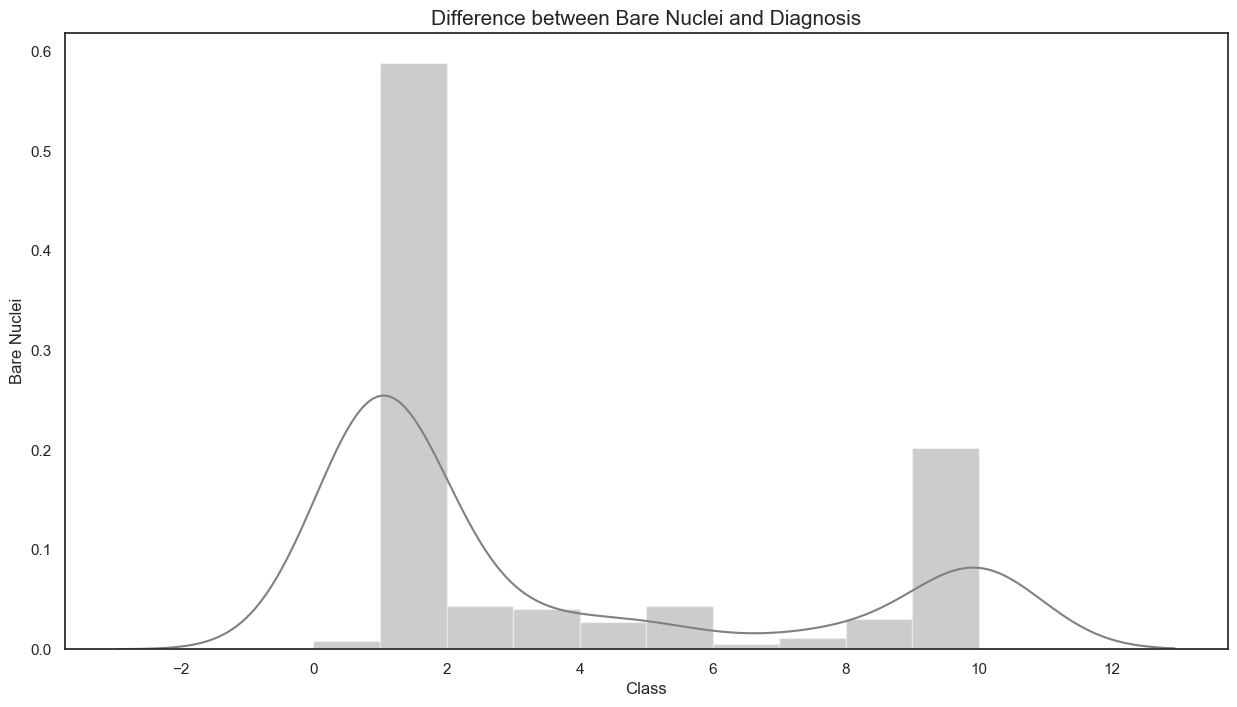

In [84]:
plt.figure(figsize=(15,8))
sns.distplot(df['Bare_Nuclei'], hist=True, bins=10, color='grey')
plt.xlabel('Class')
plt.ylabel('Bare Nuclei')
plt.title('Difference between Bare Nuclei and Diagnosis', fontsize=15)

<Figure size 1000x1000 with 0 Axes>

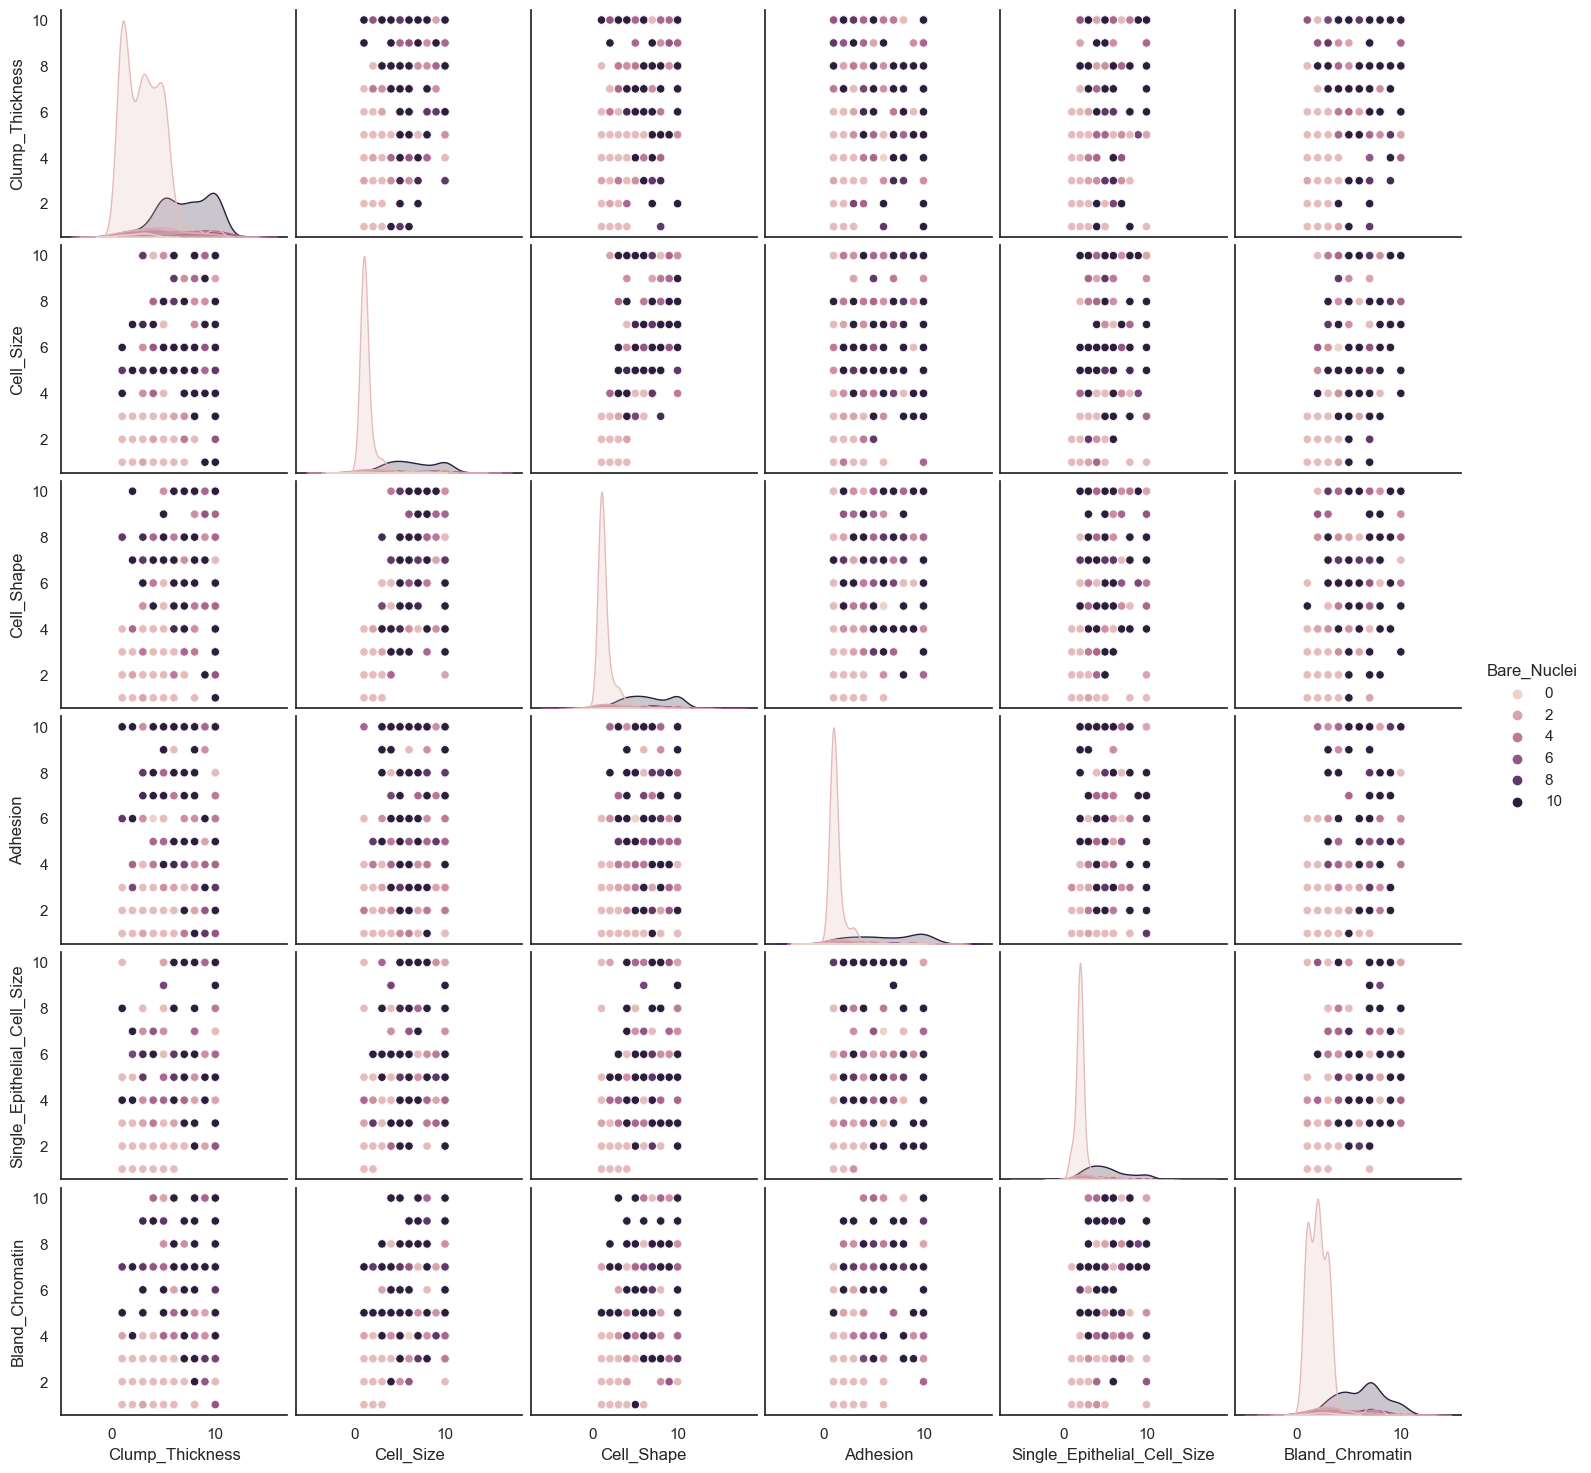

In [85]:
# Created a pairplot to help visualise the correlation between Bare Nuclei and remainder of dataset.
plt.figure(figsize =(10,10))
columns= [df.columns]
sns.pairplot(df.iloc[:, 0:7], hue='Bare_Nuclei')

## Data Synthesizing - 1) Logistic Regression

### Classifier Data 

For the data synthesis section of this project I have used two seperate machine learning classifiers in order to analyse the data and predict what future data might look like; Logistic Regression and K-Nearest Neighbour (KNN).
The first classifier I used is called ['Logistic Regression'](https://towardsdatascience.com/the-perfect-recipe-for-classification-using-logistic-regression-f8648e267592#:~:text=Logistic%20Regression%20is%20a%20classification%20technique%20used%20in%20machine%20learning,cancer%20is%20malignant%20or%20not). Logistic Regression was chosen because I am trying to predict whether a sample is Malignant or Benign - Logistic Regression uses a logistic function to model the dependent variable. The variable is dichotomous in nature (there are only 2 possible outcomes, malignant or benign). I thought about using Linear Regression. however the Linear Regression model is problematic however as 'linear regression is not suitable for classification problems as it is unbounded and the predicted value is continuous, and not probabilistic.'(3)

#### What is Logistic Regression?

'It uses a logistic function to model the dependent variable. The dependent variable is dichotomous in nature, i.e. there could only be two possible classes (eg.: either the cancer is malignant or not). As a result, this technique is used while dealing with binary data.' (3)

There are 3 different types of further classification:

1. Binomial - Where the target variable only has two outcomes (1 or 0)

2. Multinomial - Where the target variable has 3 or more outocmes  which may nto have quantative significance (ie. Predicting Disease)

3. Ordinal - Where the target variables have ordered catergories (Scores from 1-5 for example)

For Logistic Regression to map the predicted values to probabilities sigmoid function is used. This function boils eveyrthing down to a value between 0 and 1. This function also has a non-negative derivative at each point and one inflection point.

Once the 'training' of the classifier has been carried out, I use [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix) to summarise the performance of the prediction model. In the Confusion Matrix there are two classes - Positive(1) and Negative(0). I then also run the classification report below to find the accuracy of the prediction.

The major advantage fo using Logistic Regression is that it is easy to implement and efficient to 'train'. It also performs well because the desried outcome is linearly seperable (ie. Malignant or Benign - either cancerous or not) there is no real grey area for ambiguity.

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,698.0,4.416905,2.817673,1.0,2.0,4.0,6.0,10.0
Cell_Size,698.0,3.137536,3.052575,1.0,1.0,1.0,5.0,10.0
Cell_Shape,698.0,3.210602,2.972867,1.0,1.0,1.0,5.0,10.0
Adhesion,698.0,2.809456,2.856606,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,698.0,3.217765,2.215408,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,698.0,3.481375,3.630387,0.0,1.0,1.0,5.0,10.0
Bland_Chromatin,698.0,3.438395,2.440056,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,698.0,2.869628,3.055004,1.0,1.0,1.0,4.0,10.0
Mitoses,698.0,1.590258,1.716162,1.0,1.0,1.0,1.0,10.0
Class,698.0,2.690544,0.951596,2.0,2.0,2.0,4.0,4.0


In [87]:
y = df['Class'].values
X = df.drop('Class', axis=1).values 

In [88]:
X_train, X_test, y_train, y_test = mod.train_test_split(X, y, test_size = 0.85, random_state=300) 
X_train.shape, X_test.shape

((104, 9), (594, 9))

In [89]:
model = LogisticRegression()

model.fit(X_train, y_train)

result = model.score(X_test, y_test)

print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 94.95%


In [90]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', 
                   n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [91]:
# we create a prediction test and a confusion matrix to see how accurately we can train the machine
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[379  12]
 [ 18 185]]


### Result of Data Synthesis

As you can see above, we trained the computer to correctly identify 379 true positive cases. The machine identified 12 false positive cases along with 18 false negative cases and 185 true negative cases in the prediction test. These results are displayed below in a heatmap.

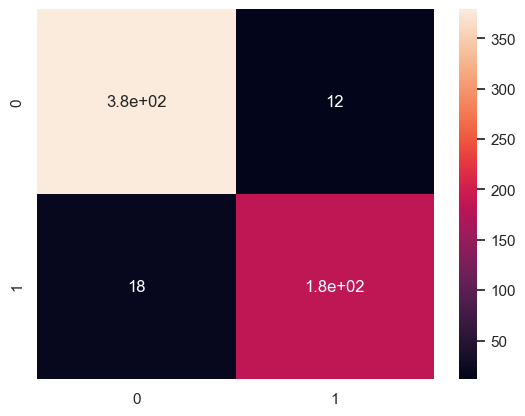

In [92]:
sns.heatmap(cm, annot=True)
plt.show()

In [93]:
print(classification_report(y_test, y_pred))
print("Accuracy: %.2f%%" % (result*100.0))

              precision    recall  f1-score   support

           2       0.95      0.97      0.96       391
           4       0.94      0.91      0.92       203

    accuracy                           0.95       594
   macro avg       0.95      0.94      0.94       594
weighted avg       0.95      0.95      0.95       594

Accuracy: 94.95%


## 2) K-Nearest Neighbour

I then introduced [K-Nearest Neighbour](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), another machine learning algorithm which is a supervised learner for both classification and regression. 

### What is K-Nearest Neighbour?

'KNN is a simple, supervised machine learning (ML) algorithm that can be used for classification or regression tasks - and is also frequently used in missing value imputation. It is based on the idea that the observations closest to a given data point are the most "similar" observations in a data set, and we can therefore classify unforeseen points based on the values of the closest existing points. By choosing K, the user can select the number of nearby observations to use in the algorithm.'(4)

K is the number of nearest neighbours to use - for classification a majority vote is used to determine which class a new observation should fall into. A larger K value means smoother curves of seperation - resulting in less complex models.

The advantage of K-Nearest Neighbour are that it is a simple supervised machine learning algorithm.



In [94]:
# I drop the 'class' column from the second variable as it will confuse the machine learning algorithm 
# as it is linearly seperable and in turn will reduce accuracy.

y = df['Class'].values
X = df.drop('Class', axis=1).values 

In [95]:
# Start by train_test_split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define knn
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)

# Training the machine with our model
knn_model_1 = knn.fit(X_train, y_train)

# Print result and divide it by the x and y test scores to check accuracy
print('Accuracy for Knn-test: %.2f%%' % knn_model_1.score(X_test, y_test))

Accuracy for Knn-test: 0.96%


In [96]:
y_true, y_pred = y_test, knn_model_1.predict(X_test)

# print classification report for more detailed breakdown of results
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       139
           4       0.94      0.94      0.94        71

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



In [97]:
# introduce scale to imporve accuracy in result
Xs = scale(X)

# train_test_split 
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=42)

# create knn2_model function
knn_model_2 = knn.fit(Xs_train, y_train)

# print reults for test sets and training sets 
print('k-NN score for training set: %.2f%%' % knn_model_2.score(Xs_train, y_train))
print('k-NN score for test set: %.2f%%' % knn_model_2.score(Xs_test, y_test))

# print accuracy percentage same as above
y_true, y_pred = y_test, knn_model_2.predict(Xs_test)

k-NN score for training set: 0.98%
k-NN score for test set: 0.98%


In [98]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           2       0.99      0.97      0.98       135
           4       0.95      0.99      0.97        75

    accuracy                           0.98       210
   macro avg       0.97      0.98      0.97       210
weighted avg       0.98      0.98      0.98       210

